# 한국인 군입대 남성 목둘레치수를 예측해 개인 맞춤형 군복제작하기 EDA 
EDA : Exploratory Data Analysis, 탐색적데이터분석(초벌분석)

##  제1장  데이터셋 확인, 데이터전처리와 분석환경 불러오기
프로젝트 시작하기

In [3]:
# http://kaggle-kr.tistory.com/18?category=821486 참고

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 26: invalid continuation byte 
# 엑셀 utf-8 cvs로 저장, encoding='utf-8' 추가

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# file locations 
from pathlib import Path
from datetime import datetime

%matplotlib inline

In [4]:

import sys

# encoding이 "utf-8" 한글이 깨지는 경우가 종종 있다. 
# sizeKorea의 data의 경우 encoding을 "euc_kr"로 하였을 경우 문제 해결
sizeKoreaData = pd.read_csv("data/raw/2015_7_sizeKoreaData.csv", encoding = "euc_kr") 
print("{}".format(sys.stdout.encoding))
#print("{}".format(sizeKoreaData.head()))
#print("{}".format(sizeKoreaData.shape))

#null data에 대한 전처리
sizeKoreaData.isnull().sum()

#null data가 있는 row는 삭제
sizeKoreaData.dropna(inplace=True)

sizeKoreaData.isnull().sum()

# 연령 범위가 20~50대 사이인 남성 데이터 만을 추출한 데이터 처리 후 이를 저장
sizeKoreaMale2040 = sizeKoreaData[((sizeKoreaData['d06_나이_반올림']>=20) & (sizeKoreaData['d06_나이_반올림']<50)) & sizeKoreaData['d02 성별'].str.contains('남')]
print(sizeKoreaMale2040.head())
print('{}'.format(sizeKoreaMale2040.shape))
sizeKoreaMale2040.to_csv("data/processed/sizeKoreaMale2040.csv", encoding="euc-kr")

UTF-8
    d02 성별  d06_나이_반올림  d001_오른쪽어깨경사각  d002_왼쪽어깨경사각 d003_키 d005_목뒤높이  \
450      남          44           21.0          17.0  1,713     1,454   
452      남          23           24.0          24.0  1,714     1,450   
453      남          23           23.0          23.0  1,731     1,477   
454      남          23           25.0          23.0  1,730     1,468   
462      남          24           23.0          20.0  1,685     1,442   

     d017_샅높이  d031_몸무게  d037_목둘레  d038_목밑둘레     ...     d064_팔길이 d065_팔안쪽길이  \
450     790.0      78.2     407.0      458.0     ...        584.0      430.0   
452     783.0      70.3     364.0      418.0     ...        601.0      487.0   
453     737.0      74.7     380.0      439.0     ...        630.0      504.0   
454     770.0      95.0     422.0      461.0     ...        612.0      479.0   
462     793.0      70.0     374.0      437.0     ...        597.0      463.0   

    d069_다리가쪽길이 d111_머리둘레 d121_넙다리둘레 d22_넙다리중간둘레 d123_무릎둘레  d125_장딴지둘레  \
450   

## 제2장 Exploratory data analysis

### 연령 범위가 20~50대 사이인 남성 데이터 분석

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#f, ax = plt.subplots(1, 2, figsize=(28, 8))

font_path = 'H2GTRM.ttf'
fontprop = fm.FontProperties(fname=font_path, size=28)

#sizeKoreaMale2040=pd.read_csv("data/processed/sizeKoreaMale2040.csv", encoding = "euc_kr") 
print(sizeKoreaMale2040.head())
#sizeKoreaMale2040.head()

    d02 성별  d06_나이_반올림  d001_오른쪽어깨경사각  d002_왼쪽어깨경사각 d003_키 d005_목뒤높이  \
450      남          44           21.0          17.0  1,713     1,454   
452      남          23           24.0          24.0  1,714     1,450   
453      남          23           23.0          23.0  1,731     1,477   
454      남          23           25.0          23.0  1,730     1,468   
462      남          24           23.0          20.0  1,685     1,442   

     d017_샅높이  d031_몸무게  d037_목둘레  d038_목밑둘레     ...     d064_팔길이 d065_팔안쪽길이  \
450     790.0      78.2     407.0      458.0     ...        584.0      430.0   
452     783.0      70.3     364.0      418.0     ...        601.0      487.0   
453     737.0      74.7     380.0      439.0     ...        630.0      504.0   
454     770.0      95.0     422.0      461.0     ...        612.0      479.0   
462     793.0      70.0     374.0      437.0     ...        597.0      463.0   

    d069_다리가쪽길이 d111_머리둘레 d121_넙다리둘레 d22_넙다리중간둘레 d123_무릎둘레  d125_장딴지둘레  \
450       1,

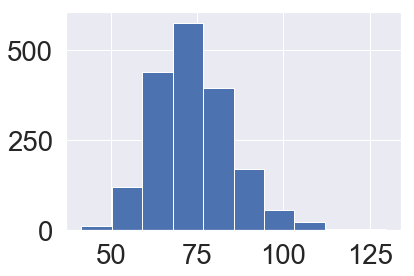

In [6]:
plt.hist(sizeKoreaMale2040['d031_몸무게'])
plt.show()

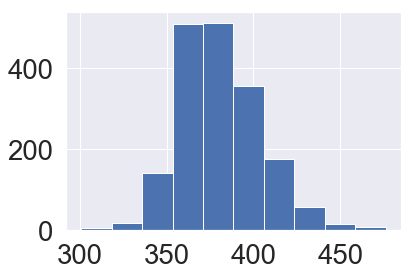

In [7]:
plt.hist(sizeKoreaMale2040['d037_목둘레'])
plt.show()

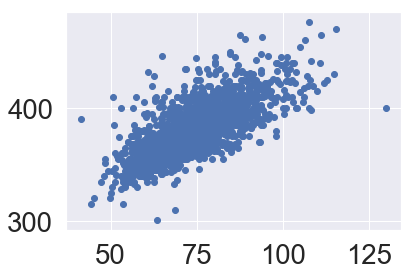

In [8]:
plt.scatter(sizeKoreaMale2040['d031_몸무게'],sizeKoreaMale2040['d037_목둘레'])
plt.show()

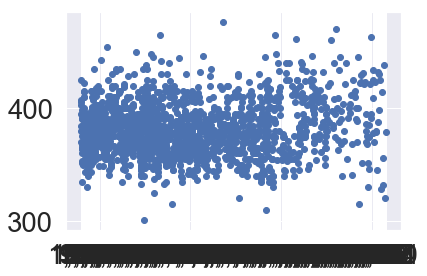

In [9]:
plt.scatter(sizeKoreaMale2040['d039_가슴둘레'],sizeKoreaMale2040['d037_목둘레'])
plt.show()

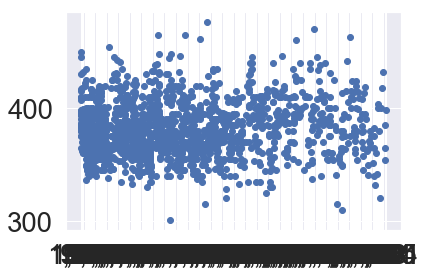

In [10]:
plt.scatter(sizeKoreaMale2040['d045_엉덩이둘레'],sizeKoreaMale2040['d037_목둘레'])
plt.show()

In [11]:
heatmap_data = sizeKoreaMale2040[['d039_가슴둘레', 'd043_배꼽수준허리둘레', 'd045_엉덩이둘레', 'd130_위팔둘레', 'd031_몸무게', 'd037_목둘레']] 
print(heatmap_data.head())

    d039_가슴둘레 d043_배꼽수준허리둘레 d045_엉덩이둘레  d130_위팔둘레  d031_몸무게  d037_목둘레
450     1,018           913      1,005      329.0      78.2     407.0
452       954           865        977      306.0      70.3     364.0
453       950           880        967      305.0      74.7     380.0
454     1,080         1,022      1,050      361.0      95.0     422.0
462       930           887        960      303.0      70.0     374.0


In [42]:
# 피어슨상관계수
df2=pd.DataFrame(sizeKoreaMale2040,columns=['d039_가슴둘레', 'd043_배꼽수준허리둘레', 'd045_엉덩이둘레', 'd130_위팔둘레', 'd031_몸무게', 'd037_목둘레'])
  
df2.describe(include='all')

,d039_가슴둘레,d043_배꼽수준허리둘레,d045_엉덩이둘레,d130_위팔둘레,d031_몸무게,d037_목둘레
count,1789,1789,1789,1789.000000,1789.000000,1789.000000
unique,302,365,279,NaN,NaN,NaN
top,980,900,935,NaN,NaN,NaN
freq,30,23,37,NaN,NaN,NaN
mean,NaN,NaN,NaN,315.162102,73.801453,380.622694
std,NaN,NaN,NaN,29.423991,11.244754,22.995164
min,NaN,NaN,NaN,218.000000,41.500000,301.000000
25%,NaN,NaN,NaN,296.000000,65.900000,365.000000
50%,NaN,NaN,NaN,314.000000,72.800000,379.000000
75%,NaN,NaN,NaN,333.000000,80.300000,395.000000


In [55]:
df2['d037_목둘레'].corr(df2['d031_몸무게'])
#상관관계 높은 수준이다
#df2['d037_목둘레'].corr(df2['d043_배꼽수준허리둘레'])의 경우, TypeError: unsupported operand type(s) for /: 'str' and 'int' 에러남

0.7233251526802308

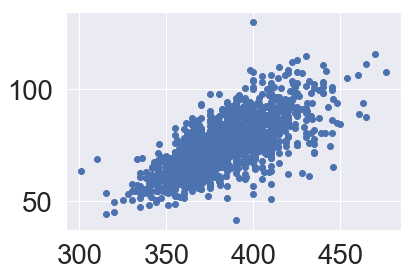

In [52]:
# 피어슨 상관계수와 산포도 관계
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(df2['d037_목둘레'],df2['d031_몸무게'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F615CBA470>,
      dtype=object)

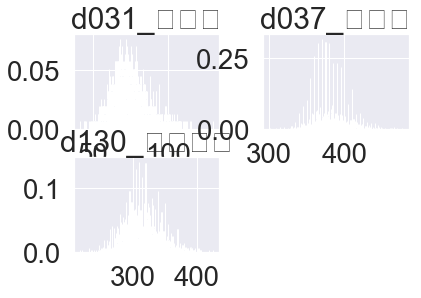

In [53]:

df2.hist(bins=1000,normed=True)

In [56]:
#heatmap 
#colormap = plt.cm.RdBu
#plt.figure(figsize=(14, 12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(heatmap_data.astype(str).corr(), linewidths=0.1, vmax=1.0,
#           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 4})

In [57]:
print("{}".format(sizeKoreaMale2040.shape))
print("{}".format(sizeKoreaMale2040.head()))
print("min: {}".format(sizeKoreaMale2040['d037_목둘레'].min()))
print("max: {}".format(sizeKoreaMale2040['d037_목둘레'].max()))
print("median: {}".format(sizeKoreaMale2040['d037_목둘레'].median()))


(1789, 30)
    d02 성별  d06_나이_반올림  d001_오른쪽어깨경사각  d002_왼쪽어깨경사각 d003_키 d005_목뒤높이  \
450      남          44           21.0          17.0  1,713     1,454   
452      남          23           24.0          24.0  1,714     1,450   
453      남          23           23.0          23.0  1,731     1,477   
454      남          23           25.0          23.0  1,730     1,468   
462      남          24           23.0          20.0  1,685     1,442   

     d017_샅높이  d031_몸무게  d037_목둘레  d038_목밑둘레     ...     d064_팔길이 d065_팔안쪽길이  \
450     790.0      78.2     407.0      458.0     ...        584.0      430.0   
452     783.0      70.3     364.0      418.0     ...        601.0      487.0   
453     737.0      74.7     380.0      439.0     ...        630.0      504.0   
454     770.0      95.0     422.0      461.0     ...        612.0      479.0   
462     793.0      70.0     374.0      437.0     ...        597.0      463.0   

    d069_다리가쪽길이 d111_머리둘레 d121_넙다리둘레 d22_넙다리중간둘레 d123_무릎둘레  d125_장딴지둘레  \
4

In [58]:
my_data = np.array(sizeKoreaMale2040.to_records())
print("my_data shape :{}".format(my_data.shape))
print("{}".format(len(my_data[0])))
#print("{}".format(len(my_data[0])))
(row, column) = my_data.shape[0], len(my_data[0])
print("{},{}".format(row, column))

my_data shape :(1789,)
31
1789,31


In [59]:
import math
TX = [x[9] for x in my_data]
print("{}".format(min(TX)))
n_training = math.floor(row * 0.8)
X = TX[1:n_training]
print("{}".format(len(X)))

301.0
1430


In [60]:
n_training = math.floor(row * 0.8)
# 12-젖가슴둘레,13-배꼽수준허리둘레,14 -배둘레, 15-엉덩이둘레, 28-위팔둘레, 7-몸무게
TX1 = [float(x[7]) for x in my_data]
TX2 = [float(x[12].replace(',','')) for x in my_data]
TX3 = [float(x[13].replace(',','')) for x in my_data]
TX4 = [float(x[14].replace(',','')) for x in my_data]
TX5 = [float(x[15].replace(',','')) for x in my_data]
TX6 = [x[28] for x in my_data]
TX = np.column_stack((TX1, TX2, TX3, TX4, TX5, TX6))
print("{}".format(TX.shape))

X = TX[1:n_training, :]
print("{}".format(X.shape))

(1789, 6)
(1430, 6)


In [61]:
v_neck_around_int = [int(x[9]) for x in my_data]
print("{}".format(min(v_neck_around_int)))

301


## 제4장 Building machine learning model and prediction using the trained model 

#Sklearn은 데이터 분석 + 머신러닝 라이브러리입니다
#importing all the required ML packages

### LogisticRegression 모델 활용해 분석합니다

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression

#pandas를 Numpy list 의 tuple로 변환합니다.
my_data = np.array(sizeKoreaMale2040.to_records())
#list의 개수 반환 , (1789,)
print("my_data shape :{}".format(my_data.shape))
#list내의 element개수 반환 (31)
print("{}".format(len(my_data[0])))
#0.02 성별,1.06_나이_반올림,2.001_오른쪽어깨경사각,3.002_왼쪽어깨경사각,4.003_키,5.005_목뒤높이
#6.017_샅높이, 7.031_몸무게, 8.037_목둘레, 9.038_목밑둘레, 10.039_가슴둘레, 11.040_젖가슴둘레
#12.042_허리둘레, 13.043_배꼽수준허리둘레, 14.044_배둘레, 15.045_엉덩이둘레, 16.052_총길이
#17.054_어깨사이길이, 18.055_어깨가쪽사이길이, 19.063_위팔길이, 20.064_팔길이, 21.065_팔안쪽길이, 22.069_다리가쪽길이
#23.111_머리둘레, 24.121_넙다리둘레, 25.122_넙다리중간둘레, 26.123_무릎둘레, 27.125_장딴지둘레, 28.130_위팔둘레, 29.131_팔꿈치둘레

# access tuple access in the list
# list의 tuple의 9번째 Element로 저장된 목둘레 길이를 접근합니다.
print("{}".format([x[9] for x in my_data]))

(row,column)= my_data.shape[0], len(my_data[0])
#전체 dataset길이의 80%를 training data크기로 지정
n_training = math.floor(row * 0.8)
n_testing = row - n_training;
print(n_training, n_testing)

#목둘레
low_value = 301
v_neck_around = [int(x[9]) for x in my_data]
min_v_neck = min(v_neck_around)  #in current dataset, min value is 301, however we set the minimum value as 270
print(v_neck_around)
print(min_v_neck)
# Test dataset을 Class로 표현
Y_Class = [int(x-low_value) for x in v_neck_around]

#import data
#예측 대상값은 : 목둘레
# training, testing data를 분배함
# 12-젖가슴둘레,13-배꼽수준허리둘레,14 -배둘레, 15-엉덩이둘레, 28-위팔둘레, 7-몸무게
TX1 = [float(x[7]) for x in my_data]
TX2 = [float(x[12].replace(',','')) for x in my_data]
TX3 = [float(x[13].replace(',','')) for x in my_data]
TX4 = [float(x[14].replace(',','')) for x in my_data]
TX5 = [float(x[15].replace(',','')) for x in my_data]
TX6 = [x[28] for x in my_data]
TX = np.column_stack((TX1, TX2, TX3, TX4, TX5, TX6))
print("{}".format(TX.shape))
# 
X_train = TX[1:n_training, :]
y_train = np.array(Y_Class[1:n_training])
X_test = TX[n_training:,:]
Y_test = Y_Class[n_training:]

h=.02 #step size in the mesh
#추가 Option 확인 ~ http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic = LogisticRegression(C=1e7,intercept_scaling=2.0,solver='liblinear')

#we create an instance of Neighbours Classifier and fit the data
logistic.fit(X_train,y_train)

print ('Predicted class {0}'.format(logistic.predict(X_test)))
print ('real class {0}'.format(Y_test))
print ('Score for test data from 27 to 50 of neck circum.: {0}'.format(logistic.score(X_test,Y_test)))

Result_Dec=logistic.predict(X_test)
prediction = .0
n_test_samples = len(Y_test)
print('N test sample {0}'.format(n_test_samples))
for number in range(0,n_test_samples):
    if(abs(round(Result_Dec[number])-Y_test[number])<=30.0):
        prediction += 1.0
prediction /= n_test_samples

print ('Score for test data from 27 to 50 of neck circum.: {0}'.format(prediction))

my_data shape :(1789,)
31
[407.0, 364.0, 380.0, 422.0, 374.0, 370.0, 354.0, 345.0, 378.0, 378.0, 370.0, 400.0, 363.0, 355.0, 360.0, 373.0, 403.0, 414.0, 400.0, 370.0, 400.0, 400.0, 382.0, 415.0, 376.0, 385.0, 364.0, 360.0, 454.0, 380.0, 345.0, 367.0, 382.0, 357.0, 430.0, 400.0, 395.0, 407.0, 400.0, 362.0, 375.0, 382.0, 368.0, 366.0, 335.0, 353.0, 400.0, 383.0, 350.0, 387.0, 380.0, 400.0, 380.0, 365.0, 374.0, 364.0, 350.0, 365.0, 382.0, 370.0, 388.0, 385.0, 370.0, 365.0, 380.0, 394.0, 414.0, 387.0, 370.0, 380.0, 358.0, 342.0, 417.0, 375.0, 425.0, 384.0, 350.0, 390.0, 343.0, 420.0, 355.0, 365.0, 380.0, 360.0, 364.0, 365.0, 365.0, 375.0, 355.0, 400.0, 401.0, 405.0, 398.0, 360.0, 350.0, 392.0, 382.0, 365.0, 400.0, 393.0, 390.0, 395.0, 375.0, 400.0, 340.0, 370.0, 385.0, 465.0, 430.0, 371.0, 371.0, 366.0, 397.0, 360.0, 382.0, 375.0, 385.0, 410.0, 393.0, 375.0, 365.0, 415.0, 366.0, 430.0, 390.0, 400.0, 360.0, 355.0, 403.0, 430.0, 410.0, 411.0, 350.0, 365.0, 345.0, 420.0, 370.0, 376.0, 365.0, 

In [58]:
# 모델을 세우고, 예측까지 해봤습니다. 자, 이제 모델의 성능을 한번 살펴보겠습니다.
# 아무런 파라미터 튜닝도 하지 않았고, 튜닝하면 정확도가 더 나옵니다.

print ('LogisticRegression Score for test data from 27 to 50 of neck circum.: {:.2f} 정확도로 목둘레 예측을 맞춥니다 '.format(prediction))

LogisticRegression Score for test data from 27 to 50 of neck circum.: 0.89 정확도로 목둘레 예측을 맞춥니다 


## SVM(Support Vector Machine) 모델 활용 데이터 분석합니다

In [59]:
from sklearn import svm

clf = svm.SVC(C=1.0, cache_size=200, coef0=0.0, 
    decision_function_shape='ovr', degree=23, gamma=0.265, kernel='rbf', #0.265
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

clf.fit(X_train, y_train)

print ('Predicted class {0}'.format(clf.predict(X_test)))
print ('real class {0}'.format(Y_test))
print ('Score for test data from 27 to 50 of neck circum.: {0}'.format(clf.score(X_test,Y_test)))

Result_Dec=clf.predict(X_test)
prediction = .0
n_test_samples = len(Y_test)
print('N test sample {0}'.format(n_test_samples))
for number in range(0,n_test_samples):
    if(abs(round(Result_Dec[number])-Y_test[number])<=30.0):
        prediction += 1.0
prediction /= n_test_samples

print ('Score for test data from 27 to 50 of neck circum.: {0}'.format(prediction))


Predicted class [ 69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69  69
  69  69  69  69  69  69  69  69  6

In [60]:
# 모델을 세우고, 예측까지 해봤습니다. 자, 이제 모델의 성능을 한번 살펴보겠습니다.
# 아무런 파라미터 튜닝도 하지 않았고, 튜닝하면 정확도가 더 나옵니다.

print ('Support Vector Machine Score for test data from 27 to 50 of neck circum.: {:.2f} 정확도로 목둘레 예측을 맞춥니다 '.format(prediction))

Support Vector Machine Score for test data from 27 to 50 of neck circum.: 0.82 정확도로 목둘레 예측을 맞춥니다 
